<a href="https://colab.research.google.com/github/mkotemp/fastai/blob/main/Copy_of_dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

In [ ]:
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.4 MB/s eta 0:00:00


To label our data for the cats vs dogs problem, we need to know which filenames are of dog pictures and which ones are of cat pictures. There is an easy way to distinguish: the name of the file begins with a capital for cats, and a lowercased letter for dogs:

In [ ]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [ ]:
#mko test
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_149.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_190.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_93.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_48.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_8.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_131.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_184.jpg')...]

In [ ]:
#mko test
files = get_image_files(path)
len(files)
print(files[0])

/root/.fastai/data/oxford-iiit-pet/images/Birman_149.jpg


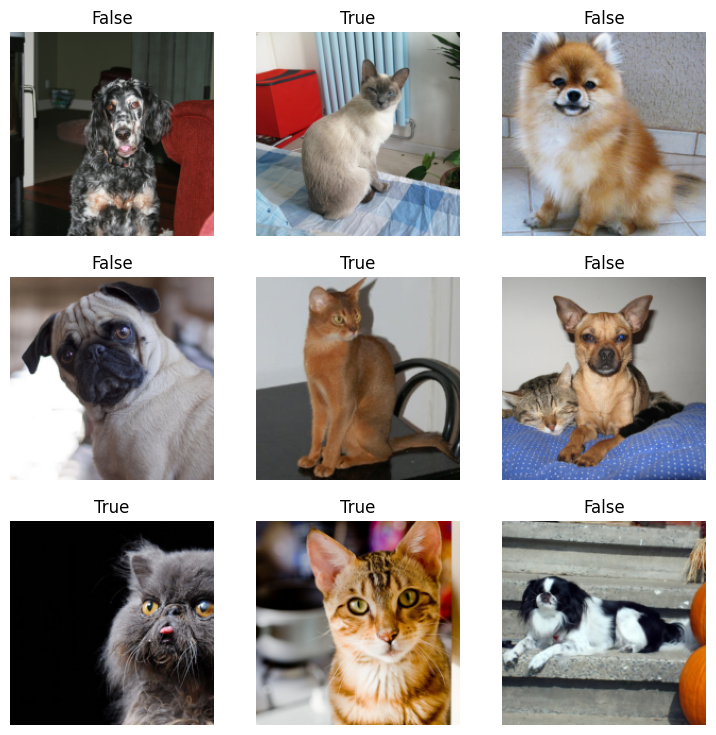

In [ ]:
dls.show_batch()

Then we can create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code.

The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then fine tuned that model and in a relatively short time, we get a model with an error rate of well under 1%… amazing!

In [ ]:
#this one does the 0 epoch - possibly the original model error-rate
learn = vision_learner(dls, resnet18, metrics=error_rate)
#this one does the fine tuning over 3 epochs.
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.202685,0.049773,0.014885,00:44


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,0.089553,0.058313,0.016238,00:42
1,0.044534,0.016367,0.006766,00:40
2,0.018953,0.014735,0.006766,00:44


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [ ]:
#mko add
learn.predict(files[0])

('True', tensor(1), tensor([1.7362e-14, 1.0000e+00]))

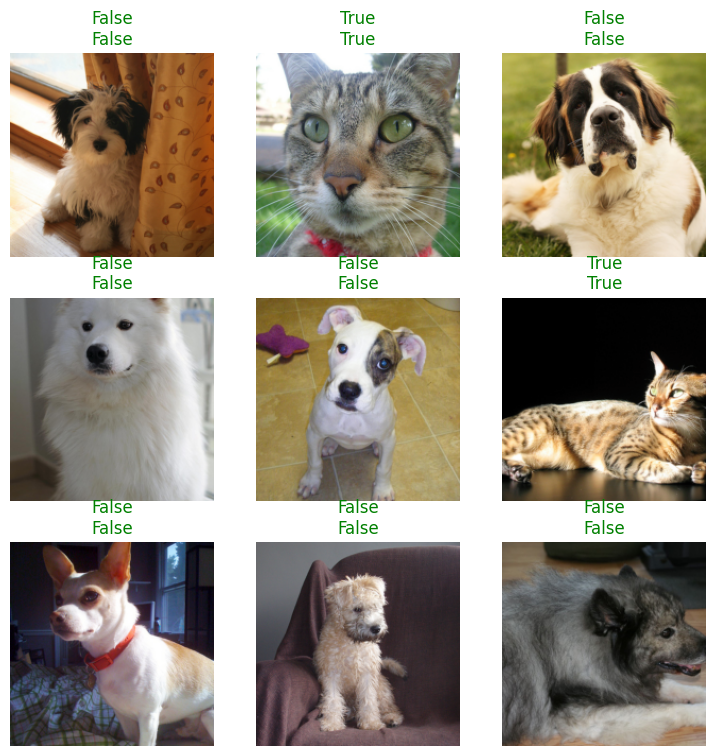

In [ ]:
#mko add
learn.show_results()

In [ ]:
#mko
files[0].name

'Birman_149.jpg'

In [ ]:
#mko
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


SuggestedLRs(valley=0.0008317637839354575)

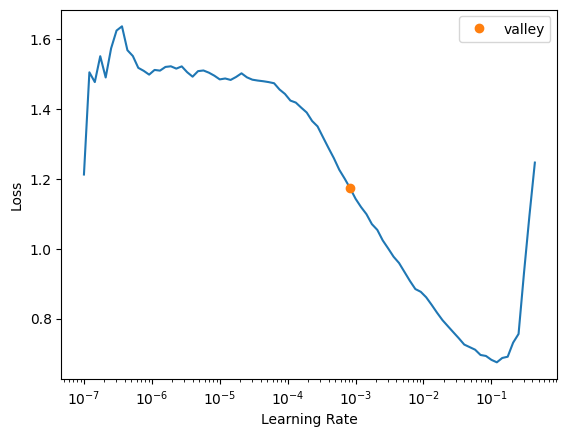

In [ ]:
#mko - find learning rate
learn.lr_find()
#mko looks like 0.1 might be optimal...anything smaller increases loss again - got stuck in local minima?
#but title ontop of graph is suggesting 0.0008

In [ ]:
#mko - testing 3e-3 as learning rate (0.15)
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.015264,0.010704,0.005413,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.064270,0.054142,0.016238,00:44
1,0.034574,0.019895,0.008796,00:46


In [ ]:
#mko - testing too big a learning rate, to see how it can jump around. add epochs to see jumps
learn.fine_tune(5,1.00)

epoch,train_loss,valid_loss,error_rate,time
0,47.431999,13779.270508,0.340325,00:44


epoch,train_loss,valid_loss,error_rate,time
0,34.487934,891.332458,0.476996,00:45
1,24.088526,133919.000000,0.353180,00:47
2,10.369280,37.586811,0.340325,00:45
3,3.080689,53213.785156,0.329499,00:45
4,1.164586,75248.007812,0.328823,00:45


In [ ]:
#mko - testing too small a learning rate, to see how it takes too long to converge - slow
learn.fine_tune(5,0.0000008)

epoch,train_loss,valid_loss,error_rate,time
0,0.719568,91685.820312,0.328146,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.764556,100970.156250,0.328146,00:48
1,0.748304,88690.914062,0.327470,00:45
2,0.729260,52675.253906,0.328823,00:45
3,0.763153,72632.335938,0.330176,00:45
4,0.759255,89654.617188,0.330176,00:45


In [ ]:
#mko - testing valley from previous slide as learning rate  (0.008)
learn.fine_tune(2,0.0008317637839354575)

epoch,train_loss,valid_loss,error_rate,time
0,0.016552,0.013086,0.006089,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.017714,0.007709,0.002030,00:45
1,0.011189,0.004739,0.002030,00:46


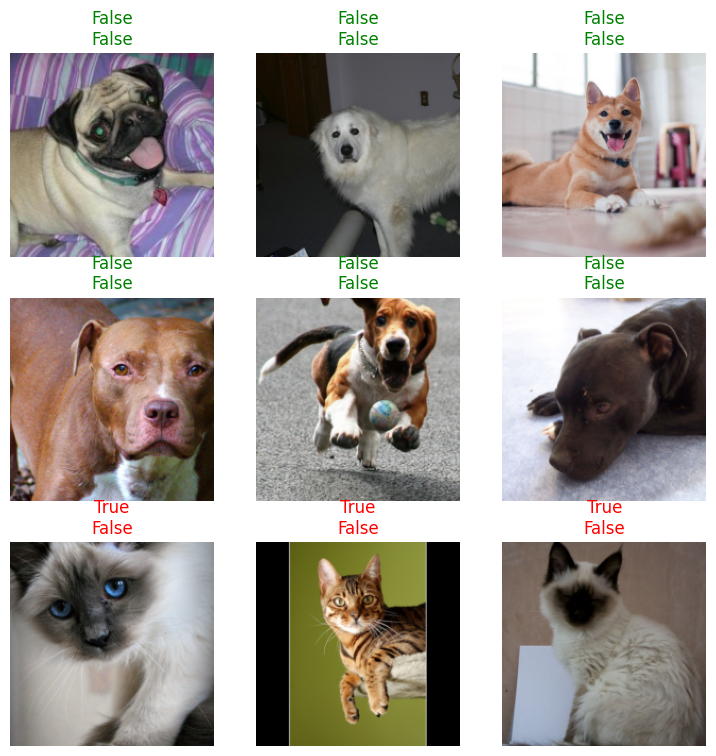

In [ ]:
#mko see how well this one does - should be good
learn.show_results()

In [ ]:
learn.export('model.pkl')